In [1]:
%matplotlib inline

In [2]:
import analysis3 as a3

In [3]:
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata

In [4]:
import numpy as np
import nibabel as nib
import pickle

In [5]:
path = 's275_to_ara3_regis.nii'

In [6]:
## Load registered brain using nibabel
im = nib.load(path)
im = im.get_data()
print(im.shape)

(1140, 800, 1320)


In [27]:
## Get CLAHE'd image using pipeline
clahe_im = a3.apply_clahe(path)

Completed CLAHE!


In [7]:
with open('s275_centroids_dict.pickle', 'rb') as handle:
    s275 = pickle.load(handle)

In [18]:
region_count = {};

for key in s275:
    region_count[key] = s275[key][3];

In [10]:
import operator

In [21]:
sorted_by_size = sorted(region_count.items(), key=operator.itemgetter(1), reverse=True)

In [23]:
## sorted_by_size is a list with each value being a tuple.  The first element of the tuple is the regionID,
## and the second element of the tuple is the number of occurrences.  We take the top 10 most frequent regions...
print sorted_by_size[:10]

[(672, 700), (648, 141), (943, 125), (56, 113), (10703, 112), (194, 111), (767, 96), (844, 94), (962, 90), (258, 79)]


In [24]:
## Store centers of the brightest point

xs = [];
ys = [];
zs = [];

for i in range(10):
    key = sorted_by_size[i][0];
    xs.append(s275[key][0]);
    ys.append(s275[key][1]);
    zs.append(s275[key][2]);

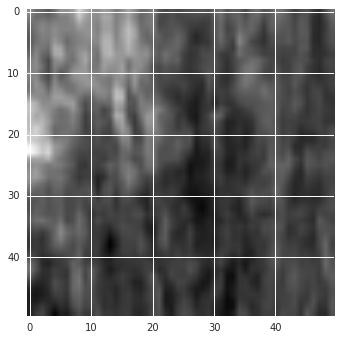

In [25]:
##  For the top few regions, visualize the raw image/post-CLAHE image centered at each point.
##  Raw brain centered at centroid of brightest region:
im_slice = im[int(round(zs[0])), (int(round(ys[0])) - 25):(int(round(ys[0])) + 25), (int(round(xs[0])) - 25): (int(round(xs[0])) + 25)]

plt.imshow(im_slice, cmap='gray')
plt.show()

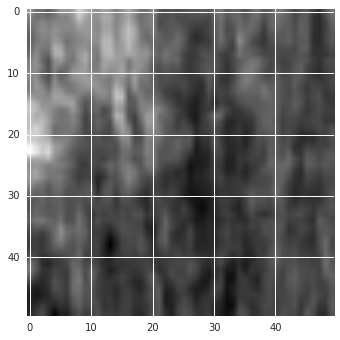

In [28]:
##  Post-clahe'd brain centered at centroid of brightest region:
clahe_im_slice = clahe_im[int(round(zs[0])), (int(round(ys[0])) - 25):(int(round(ys[0])) + 25), (int(round(xs[0])) - 25): (int(round(xs[0])) + 25)]

plt.imshow(clahe_im_slice, cmap='gray')
plt.show()

In [60]:
def plot_hist(im, title=''):
    hist,bins = np.histogram(im.flatten())

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'b')
    plt.hist(im.flatten(), color = 'r')
    plt.title(title)
    plt.legend(('histogram'), loc = 'upper left')
    plt.show()